<a href="https://colab.research.google.com/github/AgusteFatu/burayaneyazcaz/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Data & Summary

In [196]:
data = pd.read_csv('https://raw.githubusercontent.com/AgusteFatu/burayaneyazcaz/main/data/mtcars.csv')
del data['Unnamed: 0']
del data['carb']
#data.rename(columns={'Unnamed: 0': 'Car'}, inplace=True)

pd.options.display.float_format = '{:,.2f}'.format



In [197]:
# Example observations
display(data.sample(5,random_state=42))
print("\n{} Rows and {} columns.".format(data.shape[0],data.shape[1]))

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
29,19.70,6,145.00,175,3.62,2.77,15.50,0,1,5
15,10.40,8,460.00,215,3.00,5.42,17.82,0,0,3
24,19.20,8,400.00,175,3.08,3.85,17.05,0,0,3
17,32.40,4,78.70,66,4.08,2.20,19.47,1,1,4
8,22.80,4,140.80,95,3.92,3.15,22.90,1,0,4



32 Rows and 10 columns.


In [198]:
# Information about the variables dtype and columns, non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
dtypes: float64(5), int64(5)
memory usage: 2.6 KB


In [199]:
# Summary Statistics 
pd.DataFrame(data['mpg'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,32.00,20.09,6.03,10.40,15.43,19.20,22.80,33.90


In [200]:
# Summary Statistics 
pd.DataFrame(data['cyl'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,32.00,6.19,1.79,4.00,4.00,6.00,8.00,8.00


In [201]:
# Summary Statistics 
pd.DataFrame(data['disp'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
disp,32.00,230.72,123.94,71.10,120.83,196.30,326.00,472.00


In [202]:
# Summary Statistics 
pd.DataFrame(data['hp'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
hp,32.00,146.69,68.56,52.00,96.50,123.00,180.00,335.00


In [203]:
# Summary Statistics 
pd.DataFrame(data['drat'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
drat,32.00,3.60,0.53,2.76,3.08,3.70,3.92,4.93


In [204]:
# Summary Statistics 
pd.DataFrame(data['wt'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
wt,32.00,3.22,0.98,1.51,2.58,3.33,3.61,5.42


In [205]:
# Summary Statistics 
pd.DataFrame(data['qsec'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
qsec,32.00,17.85,1.79,14.50,16.89,17.71,18.90,22.90


In [206]:
# Summary Statistics 
pd.DataFrame(data['vs'].value_counts()).transpose()

,0,1
vs,18,14


In [207]:
# Summary Statistics 
pd.DataFrame(data['am'].value_counts()).transpose()

,0,1
am,19,13


In [208]:
# Summary Statistics 
pd.DataFrame(data['gear'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
gear,32.00,3.69,0.74,3.00,3.00,4.00,4.00,5.00


In [209]:
# Select feature and target
X = data.drop(['mpg'],axis=1)
y = data[['mpg']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

print('Train set length: {}'.format(len(y_train)))
print('Test  set length: {}'.format(len(y_test)))

Train set length: 25
Test  set length: 7


# LRM & Regression Tree 


In [212]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Linear Regression Model 
model_LRM = LinearRegression().fit(X_train,y_train).fit(X_train,y_train)

train_MSE_LRM =metrics.mean_squared_error(y_train, model_LRM.predict(X_train))
test_MSE_LRM = metrics.mean_squared_error(y_test, model_LRM.predict(X_test))

print('Train MSE: {:,.2f}' .format(train_MSE_LRM))
print('Test MSE: {:,.2f}' .format(test_MSE_LRM))

Train MSE: 4.23
Test MSE: 9.68


In [213]:
from sklearn.tree import DecisionTreeRegressor # Regression Tree

# Regression Tree Model
regTree = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

train_MSE_REGTREE = metrics.mean_squared_error(y_train,regTree.predict(X_train))
test_MSE_REGTREE  = metrics.mean_squared_error(y_test, regTree.predict(X_test))  

print('Train MSE: {:,.2f}'.format(train_MSE_REGTREE))
print('Test MSE: {:,.2f}'.format(test_MSE_REGTREE))

Train MSE: 0.00
Test MSE: 5.33


# Bagging Tree , Random Forest and gradient Boosted Model

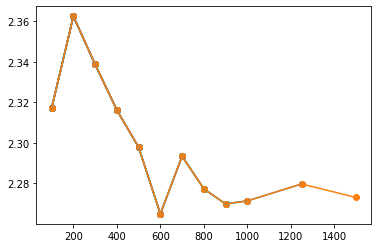

Minimum RMSE at 2.265 with 600.0 trees.
Train MSE: 1.005
Test MSE: 5.130


In [215]:
from sklearn.ensemble import BaggingRegressor
# Starting Parameters for bagging Tree 
params_B = {'n_estimators': 100,
            'max_features': 9,
           'random_state' : 42
           }
df_BAGGING = {
    'numberOfTrees' : [],
    'rmse' : []
    }

# Empty list for the X and Y values for plotting
plotX_B = []
plotY_B = []

# loop for the training bagging tree with different number of trees
for n_estimators in ([100, 200,300,400,500,600,700,800,900,1000,1250,1500]):
  params_B['n_estimators'] = n_estimators
  plotX_B.append(n_estimators)

  # Bagging Tree
  bagTree = BaggingRegressor(**params_B).fit(X_train,np.ravel(y_train))
  rmse_B = np.sqrt(mean_squared_error(y_test, bagTree.predict(X_test)))
  plotY_B.append(rmse_B)
  
  # Plotting 
  plt.scatter(plotX_B,plotY_B)
  plt.plot(plotX_B,plotY_B)

  # Storing number of trees and RMSE values 
  df_BAGGING['numberOfTrees'].append(n_estimators)
  df_BAGGING['rmse'].append(rmse_B)

  #print('{} : Rmse {:,.3f}'.format(params_B,rmse_B)) # Debug
plt.show()

# Finding lowest rmse and number of trees
df_BAGGING_pd = pd.DataFrame(df_BAGGING)
minRMSE_BAG = df_BAGGING_pd['rmse'].min()
nofTree_BAG = df_BAGGING_pd.loc[df_BAGGING_pd['rmse'].idxmin()].numberOfTrees
print('Minimum RMSE at {:,.4} with {} trees.'.format(minRMSE_BAG,nofTree_BAG))

# Training bagging tree with the best performed tree size
bagTree = BaggingRegressor(n_estimators = int(nofTree_BAG),random_state=42).fit(X_train,np.ravel(y_train))
train_MSE_BAG = mean_squared_error(y_train, bagTree.predict(X_train))
test_MSE_BAG = mean_squared_error(y_test, bagTree.predict(X_test))

print('Train MSE: {:,.3f}'.format(train_MSE_BAG))
print('Test MSE: {:,.3f}'.format(test_MSE_BAG))


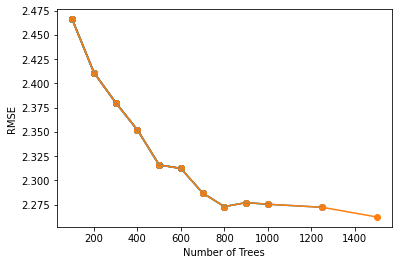

Minimum RMSE at 2.262 with 1500.0 trees.
Train MSE: 1.03
Test MSE: 5.12


In [217]:
from sklearn.ensemble import RandomForestRegressor

# Starting parameters for Random Forest
params_F = {'n_estimators': 100,
           'random_state' : 42
           }
# Empty Dictionary for storing Number of trees and RMSE 
df_FOREST = {
    'numberOfTrees' : [],
    'rmse' : []
    }

#  Empty list for the X and Y values for plotting
plotX_F = []
plotY_F = []
for n_estimators in ([100, 200,300,400,500,600,700,800,900,1000,1250,1500]):
  params_F['n_estimators'] = n_estimators
  plotX_F.append(n_estimators)

  # Random Forest
  rforest = RandomForestRegressor(**params_F).fit(X_train,np.ravel(y_train))
  rmse_F = np.sqrt(mean_squared_error(y_test, rforest.predict(X_test)))
  
  # Plotting 
  plotY_F.append(rmse_F)
  plt.scatter(plotX_F,plotY_F)
  plt.plot(plotX_F,plotY_F)

  # Storing Number of Trees and RMSE 
  df_FOREST['numberOfTrees'].append(n_estimators)
  df_FOREST['rmse'].append(rmse_F)
  # print('{} : Rmse {:,.3f}'.format(params_F,rmse_F)) # Debug

plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.show()


# Finding lowest rmse and number of trees
df_FOREST_pd = pd.DataFrame(df_FOREST)
minRMSE_F = df_FOREST_pd['rmse'].min()
nofTree_F = df_FOREST_pd.loc[df_FOREST_pd['rmse'].idxmin()].numberOfTrees
print('Minimum RMSE at {:,.4} with {} trees.'.format(minRMSE_F,nofTree_F))


# Training Random Forest with the best performed number of trees 
rforest = RandomForestRegressor(n_estimators = int(nofTree_F),random_state=42).fit(X_train,np.ravel(y_train))
train_MSE_FOREST = mean_squared_error(y_train, rforest.predict(X_train))
test_MSE_FOREST = mean_squared_error(y_test, rforest.predict(X_test))

print('Train MSE: {:,.2f}'.format(train_MSE_FOREST))
print('Test MSE: {:,.2f}'.format(test_MSE_FOREST))


Train MSE: 0.00
Test MSE: 2.99


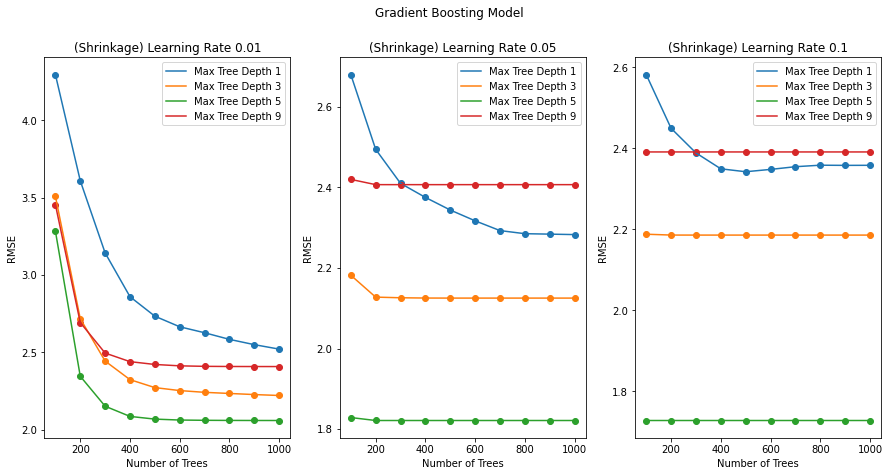

In [225]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error

# Starting Parameters for GBM Model
params2 = {'n_estimators': 100,
          'learning_rate': 0.01,
           'max_depth': 1,
           'random_state' : 42
           }

# Figure size for plotting 
f, ax = plt.subplots(1,3, figsize=(15, 7),squeeze=False)

# First loop for the learning rate parameter
for index, lRate in enumerate([0.01,0.05,0.1]):
  params2['learning_rate'] = lRate
  
  # Second loop for the max_depth Parameter
  for maxD in ([1,3,5,9]):
    plotX = []
    plotY = []
    params2['max_depth'] = maxD
    
    # Loop for the number of trees 
    for n_estimators in ([100, 200, 300,400,500,600,700,800,900,1000]):
      params2['n_estimators'] = n_estimators
      plotX.append(n_estimators)

      # Gradient Boosted Model 
      gbm = ensemble.GradientBoostingRegressor(**params2)
      gbm.fit(X_train, np.ravel(y_train))

      rmse = np.sqrt(mean_squared_error(y_test, gbm.predict(X_test)))
      plotY.append(rmse)
      
      
      #print('{} : Rmse {:,.3f}'.format(params2,rmse)) # Debug

    # Plotting
    plt.suptitle("Gradient Boosting Model")
    subplot = ax[0][index]
    subplot.set_title('(Shrinkage) Learning Rate {}'.format(lRate))

    subplot.scatter(plotX, plotY)   
    subplot.plot(plotX,plotY,label = 'Max Tree Depth {}'.format(maxD))
    
    subplot.legend(loc='upper right',fontsize = 'medium')
    subplot.set_xlabel('Number of Trees')
    subplot.set_ylabel('RMSE')


gbm = ensemble.GradientBoostingRegressor(max_depth= 5,n_estimators=400,learning_rate=0.1,random_state=42)
gbm.fit(X_train, np.ravel(y_train))

train_MSE_GMB = mean_squared_error(y_train, gbm.predict(X_train))
test_MSE_GBM = mean_squared_error(y_test, gbm.predict(X_test))

print('Train MSE: {:,.2f}'.format(train_MSE_GMB))
print('Test MSE: {:,.2f}'.format(test_MSE_GBM))

In [227]:
# Model RMSE values for Comparison
tableData = {'Linear Reg. M. RMSE' : [np.sqrt(train_MSE_LRM),np.sqrt(test_MSE_LRM)], 'Reg Tree RMSE': [np.sqrt(train_MSE_REGTREE),np.sqrt(test_MSE_REGTREE)],'Bagging Tree RMSE': [np.sqrt(train_MSE_BAG),np.sqrt(test_MSE_BAG)],'Random Forest RMSE': [np.sqrt(train_MSE_FOREST),np.sqrt(test_MSE_FOREST)],'GBM RMSE': [np.sqrt(train_MSE_GMB),np.sqrt(test_MSE_GBM)] }
table = pd.DataFrame(tableData,index = {'Train set': '0','Test Set': '1'})
table

,Linear Reg. M. RMSE,Reg Tree RMSE,Bagging Tree RMSE,Random Forest RMSE,GBM RMSE
Train set,2.06,0.00,1.00,1.01,0.00
Test Set,3.11,2.31,2.26,2.26,1.73
